# **Concrete Compressive Strngth Prediction**

Concrete is one of the most important materials in Civil Engineering.Knowing the compressive strngth of Concrete is a highly nonlinear function of ingredients used in making it and thier characteristics.Thus, using Machine Learning to predict the strength could be useful in generating a combination of ingredients which result in Strength.

# **About DataSet**


Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable


Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable

Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

Age -- quantitative -- Day (1~365) -- Input Variable

Concrete compressive strength -- quantitative -- MPa -- Output Variable

# **Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

import warnings
warnings.filterwarnings("ignore")

# **Getting Data from Drive**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/concrete.csv')

In [ ]:
df=df.rename({'Cement (component 1)(kg in a m^3 mixture)':'Cement'},axis=1)
df=df.rename({'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Blast Furnace Slag'},axis=1)
df=df.rename({'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly Ash'},axis=1)
df=df.rename({'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer'},axis=1)
df=df.rename({'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine Aggregate'},axis=1)
df=df.rename({'strength':'Compressive Strength'},axis=1)
df = df.rename(columns={"Water  (component 4)(kg in a m^3 mixture)": "Water"})
df = df.rename(columns={'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'Coarse Aggregate'})
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Compressive Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


# **Printing top 5 rows**

In [ ]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Compressive Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# **Printing bottom 5 rows**

In [ ]:
df.tail()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Compressive Strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [ ]:
df.shape

(1030, 9)

Total 1030 Observations and 9 features

# **Checking Null Values**

In [ ]:
df.isna().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age (day),0
Compressive Strength,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cement                1030 non-null   float64
 1   Blast Furnace Slag    1030 non-null   float64
 2   Fly Ash               1030 non-null   float64
 3   Water                 1030 non-null   float64
 4   Superplasticizer      1030 non-null   float64
 5   Coarse Aggregate      1030 non-null   float64
 6   Fine Aggregate        1030 non-null   float64
 7   Age (day)             1030 non-null   int64  
 8   Compressive Strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age (day),1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Compressive Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


## **EDA and Distributions**

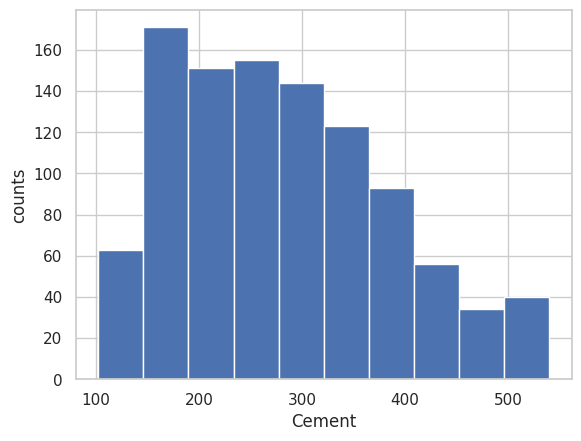

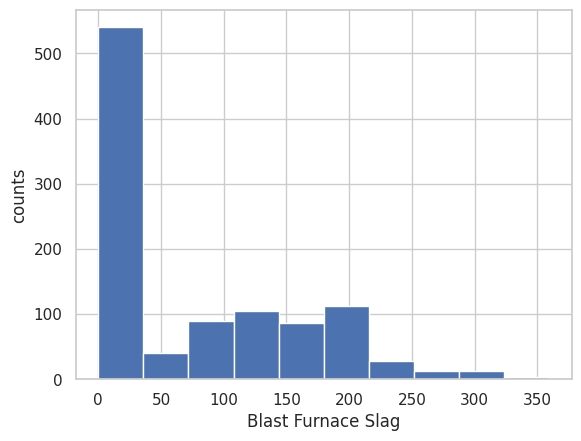

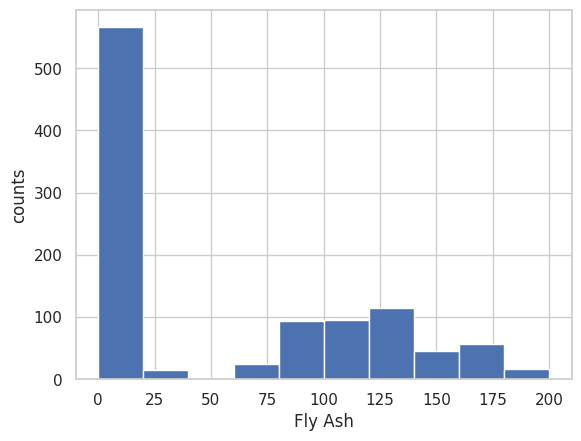

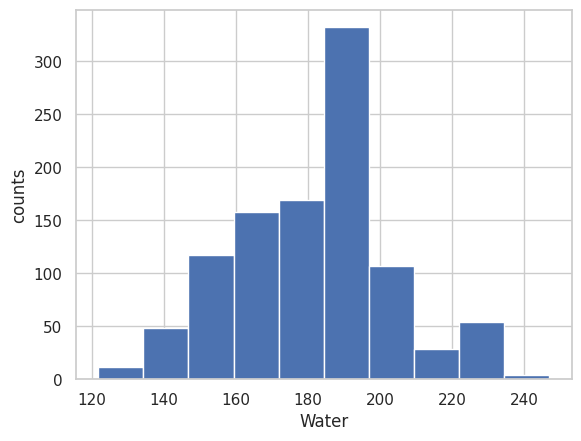

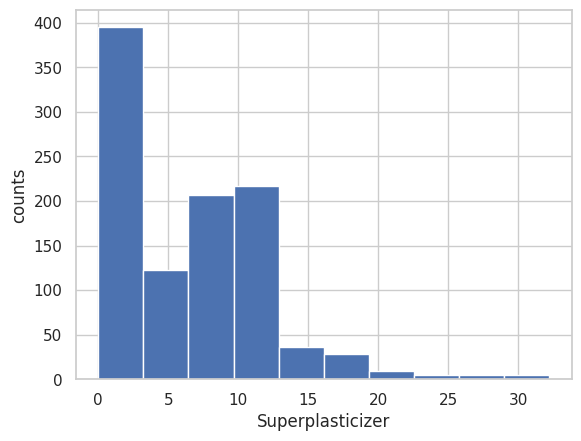

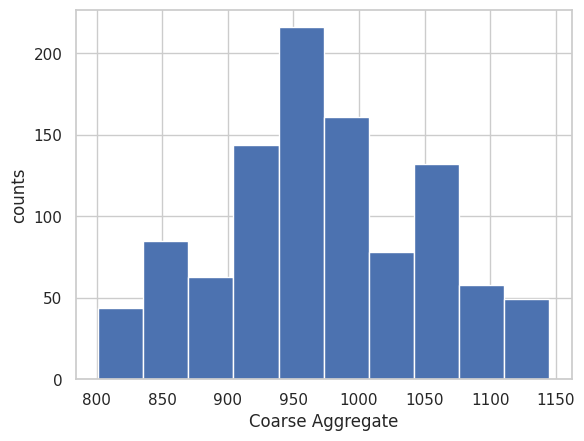

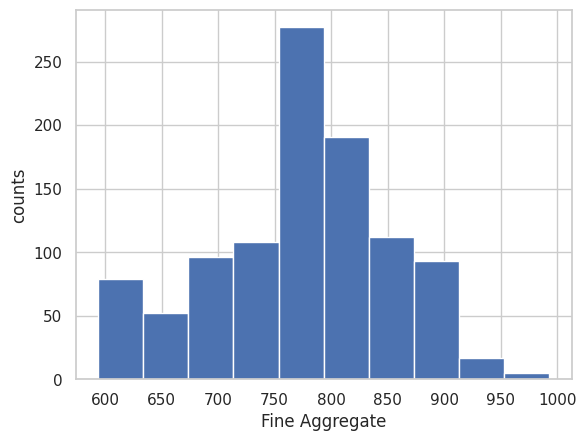

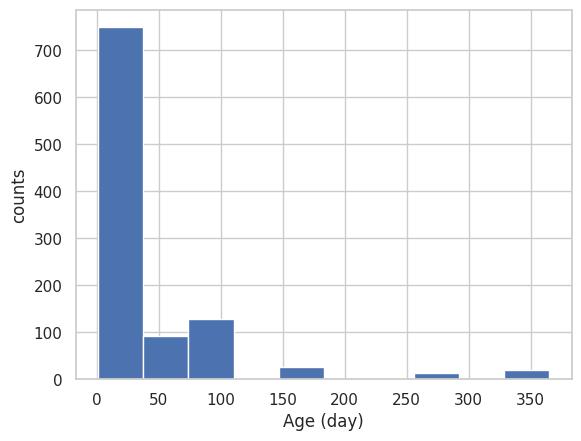

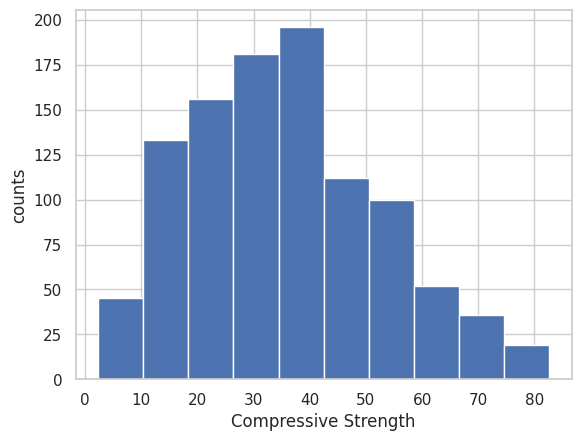

In [ ]:
#look at data distribution
for i in df.columns:
    plt.hist(df[i])
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('counts')
    plt.show()

# **Correlation of each features with compressive strength**

In [ ]:
correlation = df.corr()

<Figure size 640x480 with 0 Axes>

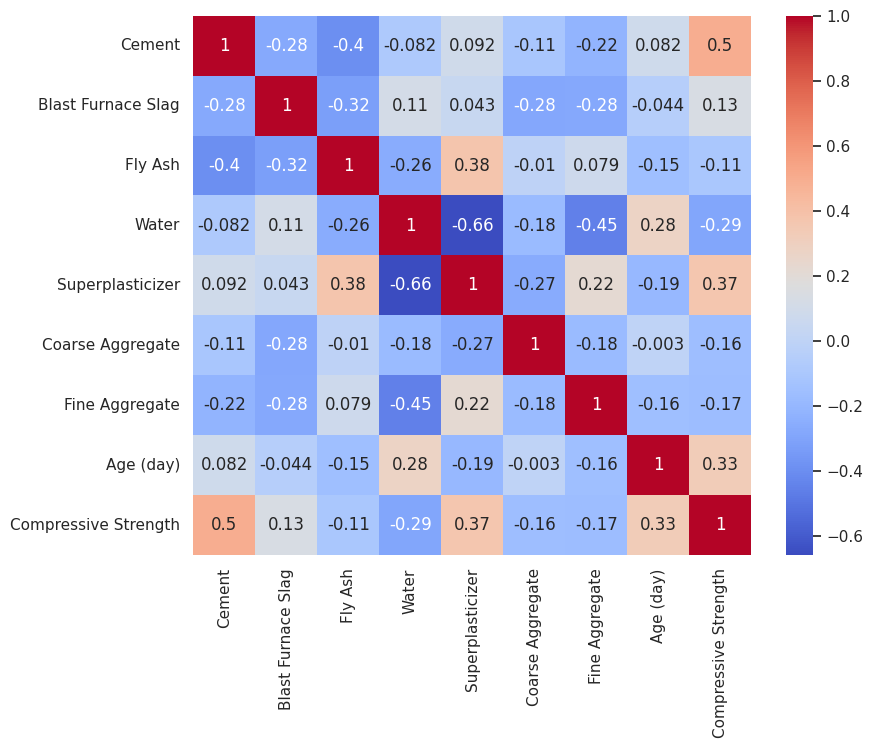

In [ ]:
plt.figure()
plt.figure(figsize=(9,7))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.show()

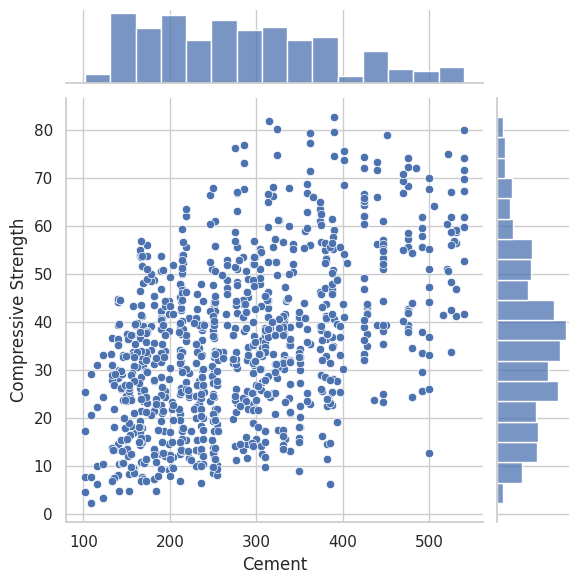

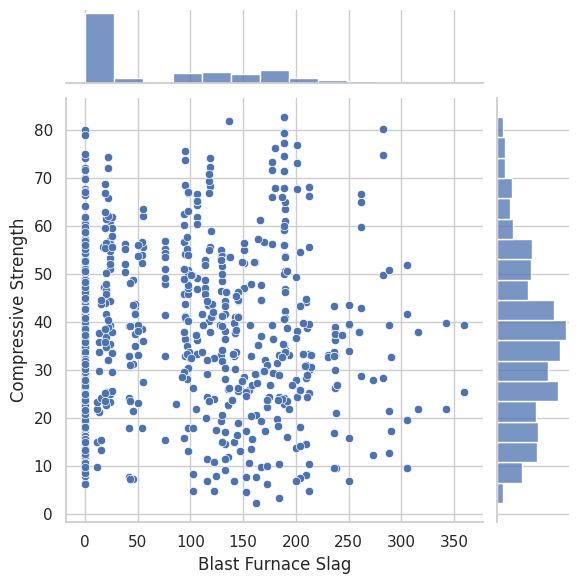

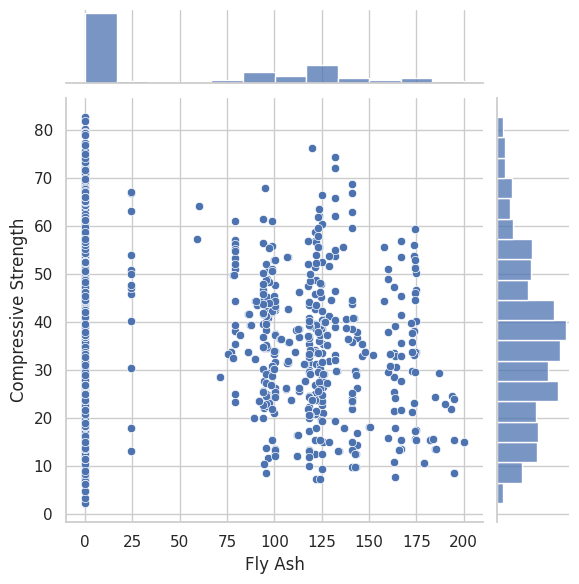

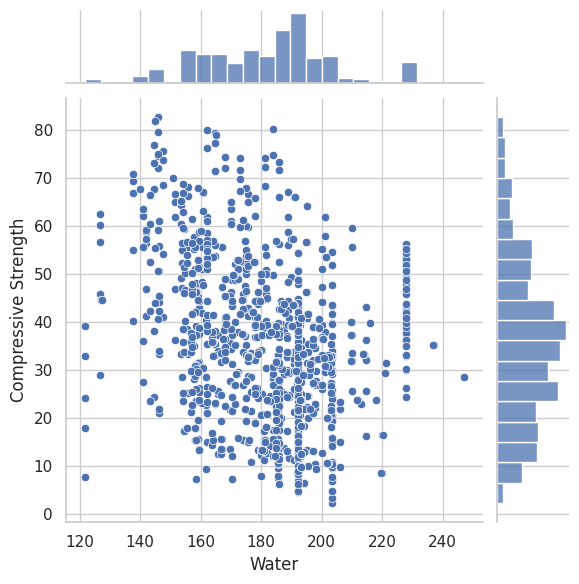

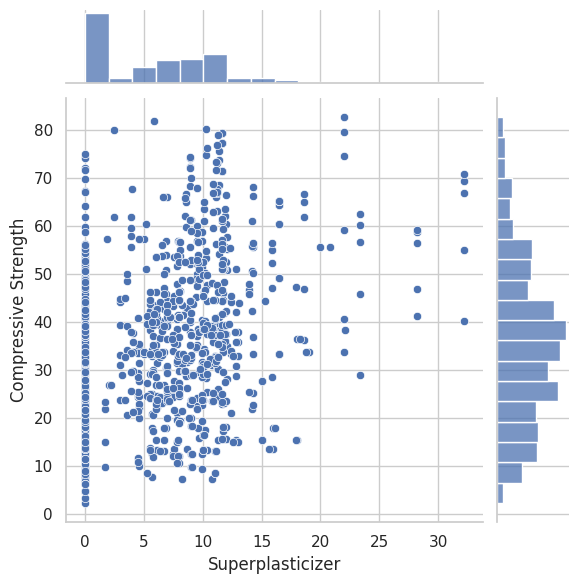

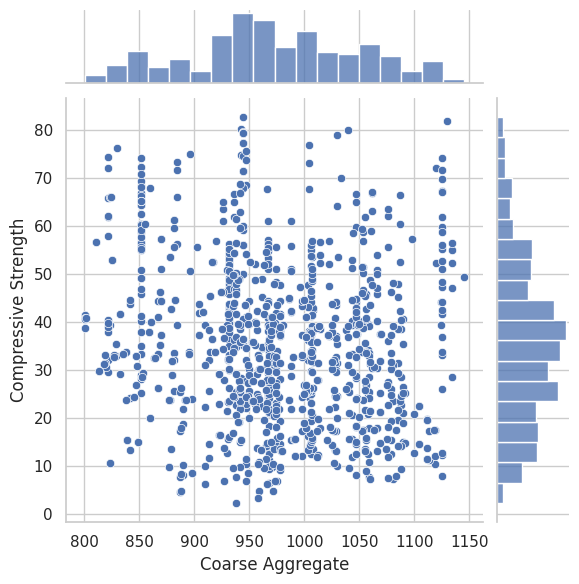

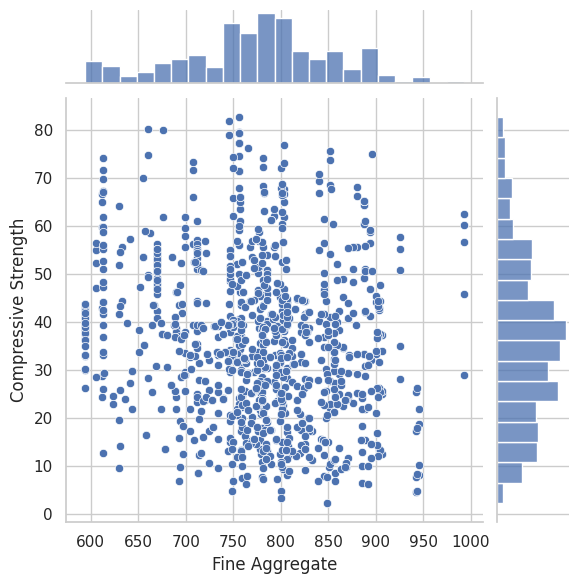

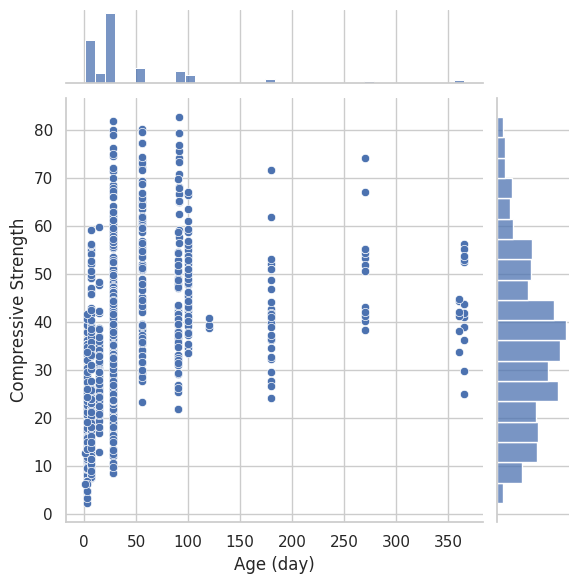

In [ ]:
sns.set(style="whitegrid")

cols_without_y = df.drop("Compressive Strength", axis=1).columns
for col in cols_without_y:
    sns.jointplot(x=df[col], y=df["Compressive Strength"])
    plt.show()

# plot strongest linear **correlation**

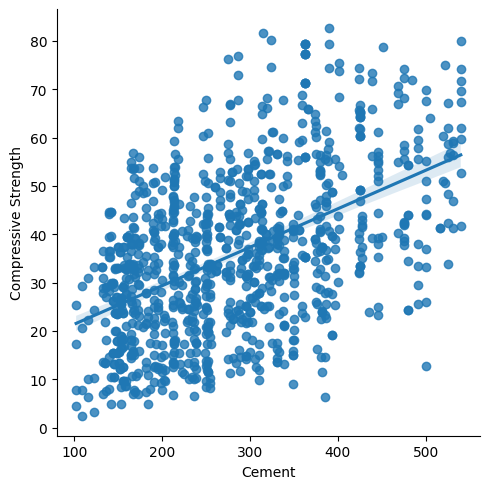

In [ ]:
sns.lmplot(x='Cement', y='Compressive Strength',data=df)
plt.show()

# **Obseravtions**

1. There aren't any high correlations between Compressive strength and other features except for Cement, which should be the case for more strength.

2. Age and super plasiticizer are the other features which are strongly correlated with Compressive strength.

3. Strength of concrete increase with moderate amount of water and it decreases with higher amount of water

4. Coarse aggregrates greatly affect the compressive strength negativaly.

Text(0.5, 1.0, 'Compressive strength distribution')

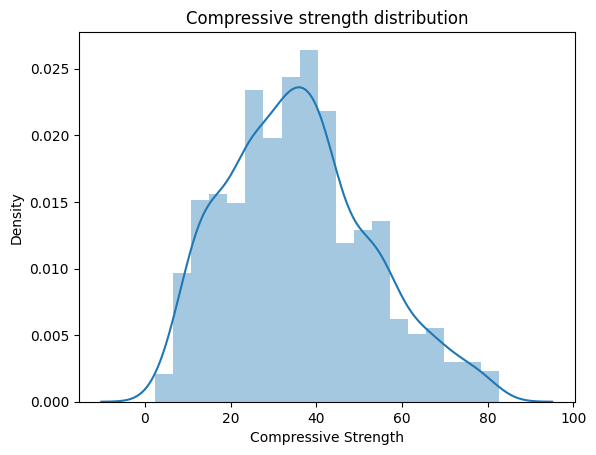

In [ ]:
ax=sns.distplot(df['Compressive Strength'])
ax.set_title('Compressive strength distribution')

# **X and y arrays**

We will need to first split up our data into an 'X' array that contains the features to train on, and a 'y' array with the target variable, in this case, the Compressive Strength column.

In [ ]:
X=df.iloc[:,:-1]
X

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [ ]:
y=df.iloc[:,-1]
y

,Compressive Strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30
...,...
1025,44.28
1026,31.18
1027,23.70
1028,32.77


# **Data Scaling**

Data scaling is the process of transforming the values of the features of a dataset till they are within a specific range, e.g. 0 to 1 or -1 to 1. This is to ensure that no single feature dominates the distance calculations in an algorithm, and can help to improve the performance of the algorithm. 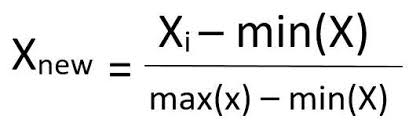

In [ ]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[1.        , 0.        , 0.        , ..., 0.69476744, 0.20572002,
        0.07417582],
       [1.        , 0.        , 0.        , ..., 0.73837209, 0.20572002,
        0.07417582],
       [0.52625571, 0.39649416, 0.        , ..., 0.38081395, 0.        ,
        0.73901099],
       ...,
       [0.10616438, 0.38786867, 0.54272864, ..., 0.26569767, 0.46663322,
        0.07417582],
       [0.1303653 , 0.51947691, 0.        , ..., 0.54825581, 0.48896136,
        0.07417582],
       [0.36278539, 0.27963272, 0.39130435, ..., 0.18459302, 0.42022077,
        0.07417582]])

## **Train Test Split**

Now, let's split the data into a training set and a testing set. We will train our model on the training set and then use the test set to evaluate the model.

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=2)

# **Machine Learning Models**

In [ ]:
models = pd.DataFrame(columns=["Model", "MAE", "MSE", "r2 Score"])

In [ ]:
def evaluate(y, y_pred):
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r_scored = r2_score(y, y_pred)
    return mae, mse, r_scored

### **Linear Regression**

In [ ]:
model_lr=LinearRegression()
model_lr.fit(X_train,y_train)
y_pred=model_lr.predict(X_test)

mae, mse, r2 = evaluate(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "r2 Score": r2}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

MAE: 8.411875559451195
MSE: 108.58819849897921
r2 Score: 0.5918179969228495


### **Support Vector Machines**

In [ ]:
model_svr=SVR()
model_svr.fit(X_train,y_train)
y_pred=model_svr.predict(X_test)

mae, mse, r2 = evaluate(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "r2 Score": r2}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

MAE: 8.380118964494498
MSE: 105.53000236547716
r2 Score: 0.6033137270374568


### **Random Forest**

In [ ]:
model_rf=RandomForestRegressor(random_state=1)
model_rf.fit(X_train,y_train)
y_pred=model_rf.predict(X_test)

mae, mse, r2 = evaluate(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)

new_row = {"Model": "Random Forest","MAE": mae, "MSE": mse, "r2 Score": r2}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

MAE: 3.53742712513484
MSE: 23.500664538122876
r2 Score: 0.9116612260133837


### **KNeighborsRegressor**

In [ ]:
model_knn=KNeighborsRegressor()
model_knn.fit(X_train,y_train)
y_pred=model_knn.predict(X_test)

mae, mse, r2 = evaluate(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)

new_row = {"Model": "KNeighborsRegressor","MAE": mae, "MSE": mse, "r2 Score": r2}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

MAE: 7.156466019417476
MSE: 85.43329967637541
r2 Score: 0.6788570408807251


### **AdaBoostRegressor**

In [ ]:
model_ab=AdaBoostRegressor()
model_ab.fit(X_train,y_train)
y_pred=model_ab.predict(X_test)

mae, mse, r2 = evaluate(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)

new_row = {"Model": "AdaBoost","MAE": mae, "MSE": mse, "r2 Score": r2}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)


MAE: 6.304453816266882
MSE: 59.621114164291015
r2 Score: 0.7758848001746659


In [ ]:
models.sort_values(by="r2 Score")

,Model,MAE,MSE,r2 Score
0,LinearRegression,8.411876,108.588198,0.591818
1,SVR,8.380119,105.530002,0.603314
3,KNeighborsRegressor,7.156466,85.433300,0.678857
4,AdaBoost,6.304454,59.621114,0.775885
2,Random Forest,3.537427,23.500665,0.911661


In [ ]:
y_new=model_rf.predict(scaler.transform([[540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28]]))
y_new

array([74.8731])

In [ ]:
import pickle
pickle.dump(model_rf,open('model.sav','wb'))

In [ ]:
pickle.dump(scaler,open('scaler.sav','wb'))